In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline



In [1]:
with open(r"video/2.mp4", 'r') as fp:
    x = len(fp.readlines())
    print('Total lines:', x) # 8


Total lines: 91


In [2]:
!ls

evaluation.py
experiments.ipynb
firstframebb
groundtruth
img
launchvideo.ipynb
plots
pocOenCVtrackers.ipynb
POCvideo.py
README.md
SOT_OpenCV_Benchmark.pdf
testargs.py
tracker_benchmark_v1.0
trackersresults
trash
video
visuaize.py


In [12]:
listtrackers = ["csrt", "kcf", "boosting", "mil", "tld", "medianflow", "mosse", "keeptrack", "dimp"]


In [23]:
for tracker in listtrackers:
    with open(r"trackersresults/6/" + tracker + ".txt", 'r') as fp:
        x = len(fp.readlines())
        print(tracker + " : " + str(x)) # 8

csrt : 127
kcf : 127
boosting : 127
mil : 127
tld : 127
medianflow : 127
mosse : 127
keeptrack : 127
dimp : 127


In [7]:
def parseresults(path):
    myfile = open(path, "r")
    L=[]
    for line in myfile:
        newline = line.replace(',' , ' ')
        newline = newline.split()
        for i in range(4):
            newline[i] = int(float(newline[i]))
        L.append(newline)

    myfile.close()
    return L

### def parseresults(path):
    myfile = open(path, "r")
    L=[]
    for line in myfile:
        newline = line.replace(',' , ' ')
        newline = newline.split()
        for i in range(4):
            newline[i] = int(float(newline[i]))
        L.append(newline)
        
    myfile.close()
    return L



In [18]:
keepbb = parseresults("trackersresults/6/keeptrack.txt")
groundtruth = parseresults("groundtruth/6.txt")

In [19]:
from videoprops import get_video_properties

props = get_video_properties("video/6.mp4")

print(f'''
Codec: {props['codec_name']}
Resolution: {props['width']}×{props['height']}
Aspect ratio: {props['display_aspect_ratio']}
Frame rate: {props['avg_frame_rate']}
''')


Codec: h264
Resolution: 352×240
Aspect ratio: 22:15
Frame rate: 25/1



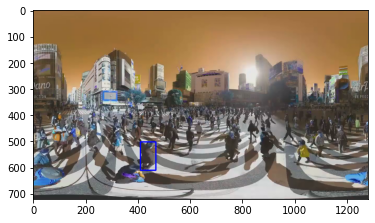

In [15]:
video = cv2.VideoCapture("shibuyavideo/shibuypart1.mp4")
while(video.isOpened()):
    ret, frame = video.read()
    if ret:
        imgresult = cv2.rectangle(frame,
                          (keepbb[0][0], keepbb[0][1]),
                          (keepbb[0][0] + keepbb[0][2], keepbb[0][1] + keepbb[0][3]),
                          color=(0, 0, 255), thickness=3)
        plt.imshow(imgresult)
        video.release()
        break

In [20]:
def apply_bb(pathofvideo, keepbb, outfilename, dimpbb = None):
    
    """
    
    apply_bb applies bounding box for each frame of the video and returns a new video

    :param pathofvideo: path of the video
    
    :param keepbb: array that contains the bounding box returned by keeptracker tracker
    
    :param outfilename: path of the outputfilename

    :param dimpbb: array that contains the boundginb box returned by another tracker

    :return: returns nothing
    
    """ 
    count = 0
    video = cv2.VideoCapture(pathofvideo)
    fourcc = cv2.VideoWriter_fourcc(*'XVID')
    output = cv2.VideoWriter(outfilename,fourcc, 25, (352,240))
    while(video.isOpened()):
        #fig, ax = plt.subplots(1,2)
        ret, frame = video.read()
        if ret:
                #ax[0].imshow(frame);
                imgresult = cv2.rectangle(frame,
                                          (keepbb[count][0], keepbb[count][1]),
                                          (keepbb[count][0] + keepbb[count][2], keepbb[count][1] + keepbb[count][3]),
                                          color=(0, 255, 0), thickness=2)
                
                if dimpbb is not None:
                    imgresult = cv2.rectangle(imgresult,
                                          (dimpbb[count][0], dimpbb[count][1]),
                                          (dimpbb[count][0] + dimpbb[count][2], dimpbb[count][1] + dimpbb[count][3]),
                                          color=(0, 0, 255), thickness=2)
                count+=1
                output.write(imgresult)
                #ax[1].imshow(frame);

        else:
            break
    output.release()
    video.release()

In [21]:
apply_bb("video/6.mp4", keepbb, "brooo/6.mp4", groundtruth)

In [1]:
def writeresult(path, listbb):
    textfile = open(path, "w")
    for bb in listbb:
        for coord in bb:
            textfile.write(coord + " ")
        textfile.write("\n")
    textfile.close()

In [3]:
!dir

 Le volume dans le lecteur C s'appelle Windows
 Le num‚ro de s‚rie du volume est 26C0-63D7

 R‚pertoire de C:\Users\louis\Desktop\NTNU\courses\videoproc

30/11/2021  02:21    <DIR>          .
30/11/2021  02:21    <DIR>          ..
29/11/2021  01:11    <DIR>          .ipynb_checkpoints
29/11/2021  13:19             3ÿ288 experiments.ipynb
30/11/2021  00:41    <DIR>          firstframebb
29/11/2021  20:05    <DIR>          groundtruth
29/11/2021  20:05    <DIR>          img
29/11/2021  13:19           160ÿ483 launchvideo.ipynb
29/11/2021  17:55             4ÿ292 pocOenCVtrackers.ipynb
30/11/2021  15:36             3ÿ463 POCvideo.py
28/11/2021  23:44               696 README.md
30/11/2021  02:21           995ÿ640 SOT_OpenCV_Benchmark.pdf
29/11/2021  23:56               679 testargs.py
29/11/2021  20:50    <DIR>          trackersresults
29/11/2021  18:10    <DIR>          tracker_benchmark_v1.0
28/11/2021  22:59    <DIR>          trash
29/11/2021  20:04    <DIR>          video
            

'cat' n'est pas reconnu en tant que commande interne
ou externe, un programme ex‚cutable ou un fichier de commandes.
